## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.

Solution: [homework.ipynb](homework.ipynb)

### Dataset

For this homework, we'll use the Car Fuel Efficiency dataset. Download it from <a href='https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'>here</a>.

You can do it with wget:
```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
```

The goal of this homework is to create a regression model for predicting the car fuel efficiency (column `'fuel_efficiency_mpg'`).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

df = pd.read_csv(path)
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


### Preparing the dataset 

Use only the following columns:

* `'engine_displacement'`,
* `'horsepower'`,
* `'vehicle_weight'`,
* `'model_year'`,
* `'fuel_efficiency_mpg'`

In [3]:
df = df[['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]

### EDA

* Look at the `fuel_efficiency_mpg` variable. Does it have a long tail? 

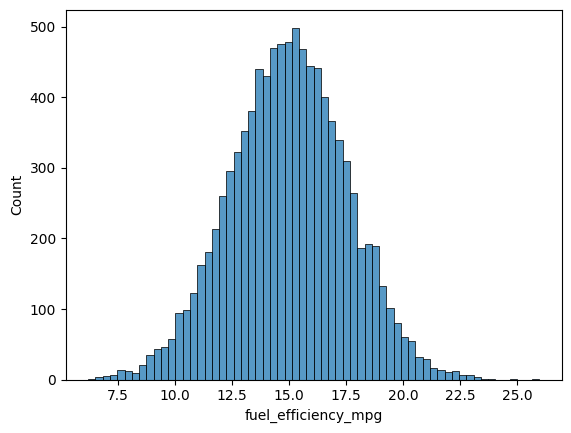

In [4]:
sns.histplot(df['fuel_efficiency_mpg'])
plt.show()

The fuel_efficiency_mpg has a normal distribution!!!

### Question 1

There's one column with missing values. What is it?

* `'engine_displacement'`
* `'horsepower'`
* `'vehicle_weight'`
* `'model_year'`

In [5]:
#checking the null values
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

### Question 2

What's the median (50% percentile) for variable `'horsepower'`?

- 49
- 99
- 149
- 199



In [6]:
#get the median for variable 'ram'
df['horsepower'].median()

149.0

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

In [7]:
# get the n elements of the dataframe
n = len(df)

#number of elements for the validation dataset
n_val = int(n*0.2)
#number of elements for the test dataset
n_test = int(n*0.2)
#number of elements for the training dataset
n_train = n - (n_val + n_test)
#create an array of the n elements of the dataframe
df_index = np.arange(n)

#ensuring the same random numbers on every run
np.random.seed(42)
#shuffle the index
np.random.shuffle(df_index)

In [8]:
num_rows= df.shape[0]
num_rows

9704

In [9]:
#train dataset will be 60%
num_rows * 0.6

5822.4

In [10]:
#val and test will be 20%
num_rows * 0.2

1940.8000000000002

In [11]:
# the first 2160 records will be used for training
df_train = df.iloc[df_index[:n_train]]
# validation set of the dataset
df_val = df.iloc[df_index[n_train:n_train+n_val]]
# test set of the dataset
df_test = df.iloc[df_index[n_train+n_val:]]

In [12]:
#when we don't need the index column we can drop it since we are creating a new index because the old index due to the shuffle was not sorted
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [13]:
#transform the y and get a numpy array using the .values otherwise would be a pandas series
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_val.fuel_efficiency_mpg.values

In [14]:
y_train.shape

(5824,)

In [15]:
df_train.shape

(5824, 5)

In [16]:
#delete the y from the datafram in order to avoid future mistakes
#better to do right away to not forget and by accident use it for training
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

In [22]:
#train linear regression without regularization
def train_linear_regression(X, y):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)

  return w_full[0],w_full[1:]

In [23]:
def prepare_X(df,fillna_value):
  #defines what value we are going to use to fill the null values  
  df = df.fillna(fillna_value)
  X = df.values
  return X

In [24]:
def rmse(y, y_pred):
  error = y -y_pred
  se = error ** 2
  mse = se.mean()
  return np.sqrt(mse)

In [25]:
# with zero
X_train = prepare_X(df_train,fillna_value=0)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, fillna_value=0)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)
round(score, 2)

0.52

In [26]:
mean = df_train.horsepower.mean()

# with mean
X_train = prepare_X(df_train,fillna_value=mean)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, fillna_value=mean)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)
round(score, 2)

0.46

It is <u>better to fill the null values with <b>zeros</b></u> , the root mean standard error of filling with zeros VS the mean is the following: 0.52 VS 0.46

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.01
- 1
- 10
- 100

In [27]:
def train_linear_regression_reg(X, y, r=0):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  #regularization of the Gram matrix
  XTX = XTX + r * np.eye(XTX.shape[0])
    
  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)

  return w_full[0],w_full[1:]

In [29]:
#regularization values to test
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    # with zero
    X_train = prepare_X(df_train,fillna_value=0)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    
    X_val = prepare_X(df_val, fillna_value=0)
    y_pred = w0 + X_val.dot(w)
    
    score =rmse(y_val, y_pred)
    
    print(r, w0, round(score, 4))

0 28.827365474598718 0.5174
0.01 24.926838421084422 0.5171
0.1 11.239661085047366 0.5188
1 1.7315979412398264 0.5222
5 0.36380750207153073 0.5229
10 0.18306246622476907 0.523
100 0.01841801730804525 0.5231


<b>100</b> is the r that gives the best RMSE

### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.001
- 0.006
- 0.060
- 0.600

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

In [31]:


def run_experiment(df, df_index, n_train, n_val, seed):

    # get the n elements of the dataframe
    n = len(df)
    
    #number of elements for the validation dataset
    n_val = int(n*0.2)
    #number of elements for the test dataset
    n_test = int(n*0.2)
    #number of elements for the training dataset
    n_train = n - (n_val + n_test)
    #create an array of the n elements of the dataframe
    df_index = np.arange(n)
    #IF I DON'T USE THE CODE ABOVE I WOULD HAVE THE WRONG ANSWER LIKE IT HAPPENED!!!
    
    # set seed for reproducibility
    np.random.seed(seed)
    
    # shuffle the index
    np.random.shuffle(df_index)
    
    # split train, val, test
    df_train = df.iloc[df_index[:n_train]].reset_index(drop=True)
    df_val   = df.iloc[df_index[n_train:n_train+n_val]].reset_index(drop=True)
    df_test  = df.iloc[df_index[n_train+n_val:]].reset_index(drop=True)
    
    # target variables
    y_train = df_train.fuel_efficiency_mpg.values
    y_val   = df_val.fuel_efficiency_mpg.values
    y_test  = df_test.fuel_efficiency_mpg.values
    
    # remove target from features
    df_train = df_train.drop(columns=["fuel_efficiency_mpg"])
    df_val   = df_val.drop(columns=["fuel_efficiency_mpg"])
    df_test  = df_test.drop(columns=["fuel_efficiency_mpg"])
    
    # prepare features
    X_train = prepare_X(df_train, fillna_value=0)
    w0, w   = train_linear_regression(X_train, y_train)
    
    # validation prediction
    X_val = prepare_X(df_val, fillna_value=0)
    y_pred = w0 + X_val.dot(w)
    
    # compute rmse
    return rmse(y_val, y_pred)

# run for seeds 0–9
seeds = list(range(10))
rmses = [run_experiment(df, df_index.copy(), n_train, n_val, s) for s in seeds]

print("RMSEs:", rmses)

RMSEs: [0.5206531296297207, 0.5213388912866506, 0.5228069974913666, 0.5159516741255491, 0.5109129460116937, 0.5283406460212935, 0.5313910658190373, 0.509067038739038, 0.5147399129482789, 0.513186590829269]


In [32]:
std_rmse=np.std(rmses)
std_rmse

0.006989446427824928

In [33]:
round(std_rmse, 3)

0.007

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 0.15
- 0.515
- 5.15
- 51.5

In [34]:
# get the n elements of the dataframe
n = len(df)

#number of elements for the validation dataset
n_val = int(n*0.2)
#number of elements for the test dataset
n_test = int(n*0.2)
#number of elements for the training dataset
n_train = n - (n_val + n_test)
#create an array of the n elements of the dataframe
df_index = np.arange(n)


# set seed for reproducibility
np.random.seed(9)

# shuffle the index
np.random.shuffle(df_index)

# split train, val, test
df_train = df.iloc[df_index[:n_train]].reset_index(drop=True)
df_val   = df.iloc[df_index[n_train:n_train+n_val]].reset_index(drop=True)
df_test  = df.iloc[df_index[n_train+n_val:]].reset_index(drop=True)

# target variables
y_train = df_train.fuel_efficiency_mpg.values
y_val   = df_val.fuel_efficiency_mpg.values
y_test  = df_test.fuel_efficiency_mpg.values

# remove target from features
df_train = df_train.drop(columns=["fuel_efficiency_mpg"])
df_val   = df_val.drop(columns=["fuel_efficiency_mpg"])
df_test  = df_test.drop(columns=["fuel_efficiency_mpg"])

#the full dataset (training and validation)
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
y_full_train = np.concatenate([y_train, y_val])

In [37]:
# prepare features
X_full_train = prepare_X(df_full_train, fillna_value=0)
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)
# validation prediction
X_test = prepare_X(df_test, fillna_value=0)
y_pred = w0 + X_test.dot(w)

# compute rmse
round(rmse(y_test, y_pred),4)

0.5156